In [98]:
# Submitted by 21EE30004: Anirvan Krishna
#              21EE30024: Shivansh Gandhi

In [2]:
import os
import random
import numpy as np

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
import math
from tqdm.notebook import tqdm

In [7]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
import torch.nn as nn

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda')

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5]),
])

In [10]:
train_data = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=128, shuffle=True)

test_data = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=128, shuffle=False)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [11]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [65]:
# For batch size 4

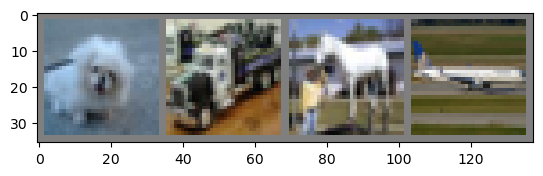

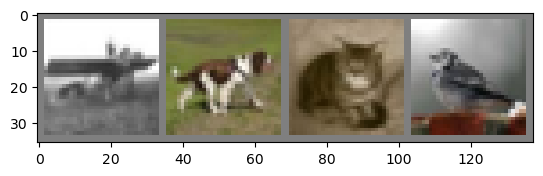

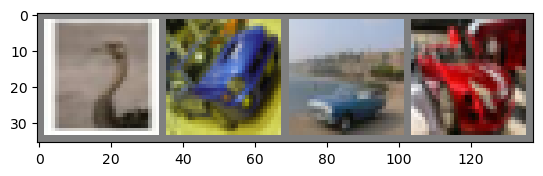

In [66]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)

for i in range(3):

    images, labels = next(dataiter)

    # show images
    imshow(torchvision.utils.make_grid(images))


In [10]:
n_epochs = 25
learning_rate = 0.008

In [ ]:
# Implementing AlexNet

In [11]:
class AlexNet(nn.Module):

    def __init__(self, num_classes=len(classes)):

        super(AlexNet, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x


In [75]:
model1 = AlexNet().to(device)

In [76]:
model1

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

In [78]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate, momentum=0.9)


In [79]:
n_total_steps = len(train_loader)

In [80]:
n_total_steps

391

In [81]:
def train(model, loss_fn = 0):

    for epochs in range(n_epochs):

        for i, (images, labels) in enumerate(train_loader):

            images = images.to(device)
            labels = labels.to(device)

            # Forward pass

            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()

            loss.backward()
            optimizer.step()

            if (i+1)%100 == 0:

                print(f'Epoch: {epochs+1}, step: {i+1}, loss = {loss: .3f}')

        print('--------------------------------')

            
    loss_fn += loss
    print('Finished Training')

In [82]:
def test(model, accuracy = 0, class_acc = []):

    with torch.no_grad():

        n_correct = 0
        n_samples = 0

        n_class_correct = [0 for i in range(10)]
        n_class_samples = [0 for i in range(10)]

        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            for i in range(16):
                
                label = labels[i]
                pred = predicted[i]

                if label == pred:
                    
                    n_class_correct[label] += 1
                
                n_class_samples[label] +=  1


        accuracy += 100 * n_correct / n_samples
        print(f'accuracy of the network = {accuracy}')

        print('--------------------------------')

        for i in range(10):

            class_acc.append(100* n_class_correct[i]/n_class_samples[i])

            print(f'accuracy of {classes[i]} = {class_acc[i]}')

In [83]:
loss = 0
train(model1, loss_fn=loss)

Epoch: 1, step: 100, loss =  2.304
Epoch: 1, step: 200, loss =  2.302
Epoch: 1, step: 300, loss =  2.302
--------------------------------
Epoch: 2, step: 100, loss =  2.302
Epoch: 2, step: 200, loss =  2.302
Epoch: 2, step: 300, loss =  2.302
--------------------------------
Epoch: 3, step: 100, loss =  2.301
Epoch: 3, step: 200, loss =  2.302
Epoch: 3, step: 300, loss =  2.299
--------------------------------
Epoch: 4, step: 100, loss =  2.294
Epoch: 4, step: 200, loss =  2.272
Epoch: 4, step: 300, loss =  2.234
--------------------------------
Epoch: 5, step: 100, loss =  2.120
Epoch: 5, step: 200, loss =  2.049
Epoch: 5, step: 300, loss =  1.888
--------------------------------
Epoch: 6, step: 100, loss =  1.876
Epoch: 6, step: 200, loss =  1.817
Epoch: 6, step: 300, loss =  1.707
--------------------------------
Epoch: 7, step: 100, loss =  1.683
Epoch: 7, step: 200, loss =  1.708
Epoch: 7, step: 300, loss =  1.742
--------------------------------
Epoch: 8, step: 100, loss =  1.547

In [85]:
class_acc_ = []
acc = 0
test(model1, acc, class_acc=class_acc_)

accuracy of the network = 70.34
--------------------------------
accuracy of airplane = 70.94017094017094
accuracy of automobile = 72.26890756302521
accuracy of bird = 74.12587412587412
accuracy of cat = 51.21951219512195
accuracy of deer = 57.00934579439252
accuracy of dog = 43.41085271317829
accuracy of frog = 71.42857142857143
accuracy of horse = 83.73983739837398
accuracy of ship = 87.87878787878788
accuracy of truck = 87.02290076335878


In [87]:
acc 

70.34

In [88]:
class_acc_ 

[70.94017094017094,
 72.26890756302521,
 74.12587412587412,
 51.21951219512195,
 57.00934579439252,
 43.41085271317829,
 71.42857142857143,
 83.73983739837398,
 87.87878787878788,
 87.02290076335878]

In [ ]:
## AlexNet with Mask with batch size 128

In [12]:
class Network(nn.Module):
    
    def __init__(self, num_classes=len(classes)):

        super(Network, self).__init__()

        self.conv = nn.Sequential(*[
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
        ])

        self.classifier = nn.Sequential(*[
            nn.Linear(256 * 2 * 2, 4096),
            nn.Linear(4096, 4096),
            nn.Linear(4096, num_classes)
        ]
                                        )

        self.masks = torch.nn.ParameterList(
            [torch.nn.Parameter(torch.Tensor(torch.ones([64, 3, 3, 3])), requires_grad=False),
             torch.nn.Parameter(torch.Tensor(torch.ones([192, 64, 3, 3])), requires_grad=False),
             torch.nn.Parameter(torch.Tensor(torch.ones([384, 192, 3, 3])), requires_grad=False),
             torch.nn.Parameter(torch.Tensor(torch.ones([256, 384, 3, 3])), requires_grad=False),
             torch.nn.Parameter(torch.Tensor(torch.ones([256, 256, 3, 3])), requires_grad=False),
             torch.nn.Parameter(torch.Tensor(torch.ones(4096, 256 * 2 * 2)), requires_grad=False),
             torch.nn.Parameter(torch.Tensor(torch.ones(4096, 4096)), requires_grad=False),
             torch.nn.Parameter(torch.Tensor(torch.ones(num_classes, 4096)), requires_grad=False)])

    def forward(self, x):

        # Multiplying the convolutional and linear layers with the mask

        with torch.no_grad():

            for i in range(len(self.conv)):
                self.conv[i].weight.copy_(self.conv[i].weight.data * self.masks[i])

            for i in range(len(self.classifier)):
                self.classifier[i].weight.copy_(self.classifier[i].weight.data * self.masks[i + 5])

        # Performing the forward pass

        # For convolution part

        for i in range(len(self.conv)):
            x = self.conv[i](x)
            x = nn.ReLU(inplace=True)(x)

            if i in [0, 1, 4]:

                x = nn.MaxPool2d(kernel_size=2)(x)

            else:
                pass


        # For fully connected part

        x = nn.Flatten()(x)

        for i in range(len(self.classifier)):

            if i < len(self.classifier) - 1:

                x = self.classifier[i](x)
                x = nn.ReLU(inplace=True)(x)

            else:

                return self.classifier[i](x)

        return x

In [13]:
def train_model(epochs, dataloader, device, model, optimizer, loss_function):
    # Set model to training mode in order to unfreeze all layers and allow gradient propagation
    model.train()

    # These two lists will be used to store average loss and accuracy for each epoch
    total_loss, acc = [], []

    # Now write out the training procedure
    for epoch in range(epochs):

        print("Epoch:", epoch + 1)

        # Each batch produces a loss, predictions and target
        batch_loss, batch_preds, batch_target = 0, [], []

        # For each batch, train the model
        for batch_idx, (x, y) in enumerate(dataloader):
            # Make sure that data is on the same device as the model
            x, y = x.to(device), y.to(device)

            # Remove all previous gradients
            optimizer.zero_grad()

            # Get predictions by performing a forward pass
            preds = model(x)

            # Calculate error
            loss = loss_function(preds, y)

            # Calculate all the gradients for each layer
            loss.backward()

            # Finall, update the weights
            optimizer.step()

            # Save the loss
            batch_loss += loss.item()

            # Save the predictions and target
            batch_preds.extend(np.argmax(preds.cpu().detach().numpy(), axis=1))
            batch_target.extend(y.cpu().detach().numpy())

        # Calculate average loss
        total_loss.append(batch_loss / len(dataloader))

        # Calculate accuracy for this epoch
        acc.append(accuracy_score(batch_target, batch_preds))
        print("Loss:", total_loss[-1], "\tAcc:", acc[-1])

    return model, total_loss, acc


def test_model(dataloader, device, model):
    # Set model to eval mode in order to freeze all layers so that no parameter gets updated during testing
    model.eval()

    # Each batch produces a loss, predictions and target
    batch_preds, batch_target = [], []

    # For each batch, train the model
    for batch_idx, (x, y) in enumerate(dataloader):

        # Make sure that data is on the same device as the model
        x, y = x.to(device), y.to(device)
        preds = model(x)

        # Save the predictions and target
        batch_preds.extend(np.argmax(preds.cpu().detach().numpy(), axis=1))
        batch_target.extend(y.cpu().detach().numpy())

    return accuracy_score(batch_target, batch_preds)


In [37]:
model = Network().to(device)

In [38]:
model

Network(
  (conv): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (classifier): Sequential(
    (0): Linear(in_features=1024, out_features=4096, bias=True)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
    (2): Linear(in_features=4096, out_features=10, bias=True)
  )
  (masks): ParameterList(
      (0): Parameter containing: [torch.float32 of size 64x3x3x3 (GPU 0)]
      (1): Parameter containing: [torch.float32 of size 192x64x3x3 (GPU 0)]
      (2): Parameter containing: [torch.float32 of size 384x192x3x3 (GPU 0)]
      (3): Parameter containing: [torch.float32 of size 256x384x3x3 (GPU 0)]
      (4): Parameter containing:

In [14]:
# Implementing Lottery Ticker style pruning
# Create the model
model = [Network().to(device), Network().to(device), Network().to(device),
        Network().to(device), Network().to(device)]

In [64]:
## Set the number of epochs to be used
epochs = 5

# Set the number of rounds
rounds = 5

# Set the sparsity level for each layer
sparsity = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracy_lth = []



# Define Loss
loss_function = torch.nn.CrossEntropyLoss()

for j in range(2):

    print(f'LTH For sparsity = {sparsity[j]}')
    
    # Define Optimizer
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    # First save the model weights that have been initialized
    init_weights = [[model[j].conv[i].weight.data.to(device) for i in range(len(model[j].conv))],
                    [model[j].classifier[i].weight.data.to(device) for i in range(len(model[j].classifier))]]

    for round_ in range(rounds):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs, train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(torch.reshape(torch.abs(model[j].conv[i].weight.data),
                                                      (1, num_filters * num_channels * num_rows * num_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(
                    torch.reshape(torch.abs(model[j].classifier[i].weight.data), (1, n_rows * n_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))
        
    
    
    model[j], _, _ = train_model(epochs, train_loader, device, model[j], optimizer, loss_function)
        
    accuracy_lth.append(test_model(test_loader, device, model[j]))
    
    print(f"Final Test Accuracy for sparsity {sparsity[j]}: {test_model(test_loader, device, model[j])} \n\n")
        


LTH For sparsity = 0.1



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.301100700407687 	Acc: 0.12006
Epoch: 2
Loss: 2.0013536977036224 	Acc: 0.23826
Epoch: 3
Loss: 1.6105111370915952 	Acc: 0.38946
Epoch: 4
Loss: 1.378594655514983 	Acc: 0.48606
Epoch: 5
Loss: 1.2075139858838542 	Acc: 0.55434
Test Accuracy before pruning: 0.5874
Test Accuracy after pruning but no retraining: 0.5879



ROUND 2 Started
----------------------
Epoch: 1
Loss: 1.0734888914296083 	Acc: 0.60548
Epoch: 2
Loss: 0.9769059890676337 	Acc: 0.64606
Epoch: 3
Loss: 0.862741475062602 	Acc: 0.68814
Epoch: 4
Loss: 0.7750627255195852 	Acc: 0.7226
Epoch: 5
Loss: 0.6891921528464998 	Acc: 0.75474
Test Accuracy after pruning and retraining: 0.7144
Test Accuracy after pruning but no retraining: 0.715



ROUND 3 Started
----------------------
Epoch: 1
Loss: 0.6060615611808075 	Acc: 0.78374
Epoch: 2
Loss: 0.5295520603961652 	Acc: 0.81154
Epoch: 3
Loss: 0.45821254412688867 	Acc: 0.83614
Epoch: 4
Loss: 0.3725221850683012 	

In [65]:
for j in range(2, 4):

    print(f'LTH For sparsity = {sparsity[j]}')
    
    # Define Optimizer
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    # First save the model weights that have been initialized
    init_weights = [[model[j].conv[i].weight.data.to(device) for i in range(len(model[j].conv))],
                    [model[j].classifier[i].weight.data.to(device) for i in range(len(model[j].classifier))]]

    for round_ in range(rounds):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs, train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(torch.reshape(torch.abs(model[j].conv[i].weight.data),
                                                      (1, num_filters * num_channels * num_rows * num_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(
                    torch.reshape(torch.abs(model[j].classifier[i].weight.data), (1, n_rows * n_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))
        
    
    
    model[j], _, _ = train_model(epochs, train_loader, device, model[j], optimizer, loss_function)
        
    accuracy_lth.append(test_model(test_loader, device, model[j]))
    
    print(f"Final Test Accuracy for sparsity {sparsity[j]}: {test_model(test_loader, device, model[j])} \n\n")
        


LTH For sparsity = 0.3



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.29935149341593 	Acc: 0.1167
Epoch: 2
Loss: 1.933738924658207 	Acc: 0.2729
Epoch: 3
Loss: 1.5713368645104606 	Acc: 0.40998
Epoch: 4
Loss: 1.3517543671990904 	Acc: 0.50128
Epoch: 5
Loss: 1.1764542077813307 	Acc: 0.5697
Test Accuracy before pruning: 0.5742
Test Accuracy after pruning but no retraining: 0.5737



ROUND 2 Started
----------------------
Epoch: 1
Loss: 1.0520697838205206 	Acc: 0.61652
Epoch: 2
Loss: 0.9437340488824089 	Acc: 0.65586
Epoch: 3
Loss: 0.8428150432189102 	Acc: 0.69624
Epoch: 4
Loss: 0.7597871216971551 	Acc: 0.7245
Epoch: 5
Loss: 0.6706590089956512 	Acc: 0.76052
Test Accuracy after pruning and retraining: 0.7169
Test Accuracy after pruning but no retraining: 0.7175



ROUND 3 Started
----------------------
Epoch: 1
Loss: 0.5873288875040801 	Acc: 0.7898
Epoch: 2
Loss: 0.5054914708942404 	Acc: 0.81944
Epoch: 3
Loss: 0.43469706981840645 	Acc: 0.84378
Epoch: 4
Loss: 0.35590425339501225 	Ac

In [66]:
for j in range(4, 5):

    print(f'LTH For sparsity = {sparsity[j]}')
    
    # Define Optimizer
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.003, momentum=0.9)

    # First save the model weights that have been initialized
    init_weights = [[model[j].conv[i].weight.data.to(device) for i in range(len(model[j].conv))],
                    [model[j].classifier[i].weight.data.to(device) for i in range(len(model[j].classifier))]]

    for round_ in range(rounds):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs, train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(torch.reshape(torch.abs(model[j].conv[i].weight.data),
                                                      (1, num_filters * num_channels * num_rows * num_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(
                    torch.reshape(torch.abs(model[j].classifier[i].weight.data), (1, n_rows * n_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))
        
    
    
    model[j], _, _ = train_model(epochs, train_loader, device, model[j], optimizer, loss_function)
        
    accuracy_lth.append(test_model(test_loader, device, model[j]))
    
    print(f"Final Test Accuracy for sparsity {sparsity[j]}: {test_model(test_loader, device, model[j])} \n\n")
        


LTH For sparsity = 0.5



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.3023919681149065 	Acc: 0.10482
Epoch: 2
Loss: 2.301122773943655 	Acc: 0.12256
Epoch: 3
Loss: 2.2893009124814396 	Acc: 0.15354
Epoch: 4
Loss: 2.0011935041993474 	Acc: 0.23458
Epoch: 5
Loss: 1.7536792499025156 	Acc: 0.33276
Test Accuracy before pruning: 0.3726
Test Accuracy after pruning but no retraining: 0.3722



ROUND 2 Started
----------------------
Epoch: 1
Loss: 1.6034383423188154 	Acc: 0.39456
Epoch: 2
Loss: 1.4774512717181154 	Acc: 0.44772
Epoch: 3
Loss: 1.385403180671165 	Acc: 0.4862
Epoch: 4
Loss: 1.29175920742552 	Acc: 0.52488
Epoch: 5
Loss: 1.1986080441633453 	Acc: 0.55754
Test Accuracy after pruning and retraining: 0.5737
Test Accuracy after pruning but no retraining: 0.5738



ROUND 3 Started
----------------------
Epoch: 1
Loss: 1.1247509556353246 	Acc: 0.5898
Epoch: 2
Loss: 1.0505538341944174 	Acc: 0.61398
Epoch: 3
Loss: 0.9964716873510414 	Acc: 0.63536
Epoch: 4
Loss: 0.942249338492713 	Acc

In [89]:
accuracy_lth # [0.7395, 0.7359, 0.7463, 0.7526, 0.7183]


[0.7395, 0.7359, 0.7463, 0.7526, 0.7183]

In [ ]:
# Performing Random Pruning

In [90]:
model = [Network().to(device), Network().to(device), Network().to(device),
        Network().to(device), Network().to(device)]

In [91]:
# Set the number of epochs to be used
epochs = 5

# Set the number of rounds
rounds = 5

# Set the sparsity level for each layer
sparsity = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracy_random = []

# Define Loss
loss_function = torch.nn.CrossEntropyLoss()

for j in range(2):

    print(f'Random Pruning for sparsity {sparsity[j]}')
    
    # Define Optimizer
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    # First save the model weights that have been initialized
    init_weights = [[model[j].conv[i].weight.data.to(device) for i in range(len(model[j].conv))],
                    [model[j].classifier[i].weight.data.to(device) for i in range(len(model[j].classifier))]]

    for round_ in range(rounds):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs, train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = np.random.randint(0, num_filters*num_channels*num_rows*num_cols, num_filters*num_channels*num_rows*num_cols)

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = np.random.randint(0, n_rows*num_cols, n_rows*num_cols)

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))
        


    model[j], _, _ = train_model(epochs, train_loader, device, model[j], optimizer, loss_function)

    accuracy_random.append(test_model(test_loader, device, model[j]))

    print(f"Final Test Accuracy for sparsity {sparsity[j]}: {test_model(test_loader, device, model[j])} \n\n")


Random Pruning for sparsity 0.1



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.299048995118007 	Acc: 0.12362
Epoch: 2
Loss: 1.9295833915700693 	Acc: 0.26496
Epoch: 3
Loss: 1.5555166905493383 	Acc: 0.41312
Epoch: 4
Loss: 1.3497544088022178 	Acc: 0.50142
Epoch: 5
Loss: 1.1827191327843825 	Acc: 0.56476
Test Accuracy before pruning: 0.5711
Test Accuracy after pruning but no retraining: 0.5546



ROUND 2 Started
----------------------
Epoch: 1
Loss: 1.0563751872238296 	Acc: 0.61278
Epoch: 2
Loss: 0.9544714991089023 	Acc: 0.65534
Epoch: 3
Loss: 0.8573707682092476 	Acc: 0.69
Epoch: 4
Loss: 0.7670325668876433 	Acc: 0.72408
Epoch: 5
Loss: 0.6780741290210763 	Acc: 0.75696
Test Accuracy after pruning and retraining: 0.6862
Test Accuracy after pruning but no retraining: 0.6525



ROUND 3 Started
----------------------
Epoch: 1
Loss: 0.6081185589361069 	Acc: 0.78214
Epoch: 2
Loss: 0.5266984532708707 	Acc: 0.81186
Epoch: 3
Loss: 0.44629404939653927 	Acc: 0.83994
Epoch: 4
Loss: 0.37402569

In [92]:
for j in range(2, 4):

    print(f'Random Pruning for sparsity {sparsity[j]}')
    
    # Define Optimizer
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    # First save the model weights that have been initialized
    init_weights = [[model[j].conv[i].weight.data.to(device) for i in range(len(model[j].conv))],
                    [model[j].classifier[i].weight.data.to(device) for i in range(len(model[j].classifier))]]

    for round_ in range(rounds):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs, train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = np.random.randint(0, num_filters*num_channels*num_rows*num_cols, num_filters*num_channels*num_rows*num_cols)

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = np.random.randint(0, n_rows*num_cols, n_rows*num_cols)

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))
        


    model[j], _, _ = train_model(epochs, train_loader, device, model[j], optimizer, loss_function)

    accuracy_random.append(test_model(test_loader, device, model[j]))

    print(f"Final Test Accuracy for sparsity {sparsity[j]}: {test_model(test_loader, device, model[j])} \n\n")


Random Pruning for sparsity 0.3



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.300968462244019 	Acc: 0.10854
Epoch: 2
Loss: 1.9998543311262984 	Acc: 0.23362
Epoch: 3
Loss: 1.619424571771451 	Acc: 0.3849
Epoch: 4
Loss: 1.394484780633541 	Acc: 0.47892
Epoch: 5
Loss: 1.217031031923221 	Acc: 0.55308
Test Accuracy before pruning: 0.5592
Test Accuracy after pruning but no retraining: 0.5687



ROUND 2 Started
----------------------
Epoch: 1
Loss: 1.088297015108416 	Acc: 0.60506
Epoch: 2
Loss: 0.9714250070664584 	Acc: 0.64766
Epoch: 3
Loss: 0.874876801010288 	Acc: 0.6856
Epoch: 4
Loss: 0.7732058579049756 	Acc: 0.7194
Epoch: 5
Loss: 0.6839916215223425 	Acc: 0.75348
Test Accuracy after pruning and retraining: 0.7158
Test Accuracy after pruning but no retraining: 0.6872



ROUND 3 Started
----------------------
Epoch: 1
Loss: 0.6258913963804464 	Acc: 0.77438
Epoch: 2
Loss: 0.5400546889780732 	Acc: 0.8075
Epoch: 3
Loss: 0.46324855622733035 	Acc: 0.83462
Epoch: 4
Loss: 0.38328598390149

In [93]:
for j in range(4, 5):

    print(f'Random Pruning for sparsity {sparsity[j]}')
    
    # Define Optimizer
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    # First save the model weights that have been initialized
    init_weights = [[model[j].conv[i].weight.data.to(device) for i in range(len(model[j].conv))],
                    [model[j].classifier[i].weight.data.to(device) for i in range(len(model[j].classifier))]]

    for round_ in range(rounds):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs, train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = np.random.randint(0, num_filters*num_channels*num_rows*num_cols, num_filters*num_channels*num_rows*num_cols)

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = np.random.randint(0, n_rows*num_cols, n_rows*num_cols)

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity[j] * 100) ** ((round_ + 1) / rounds)) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))
        


    model[j], _, _ = train_model(epochs, train_loader, device, model[j], optimizer, loss_function)

    accuracy_random.append(test_model(test_loader, device, model[j]))

    print(f"Final Test Accuracy for sparsity {sparsity[j]}: {test_model(test_loader, device, model[j])} \n\n")


Random Pruning for sparsity 0.5



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.2990792736677865 	Acc: 0.1312
Epoch: 2
Loss: 1.9270574442870783 	Acc: 0.27244
Epoch: 3
Loss: 1.5593719479373045 	Acc: 0.41338
Epoch: 4
Loss: 1.3411198613588766 	Acc: 0.50586
Epoch: 5
Loss: 1.1781377429547517 	Acc: 0.56696
Test Accuracy before pruning: 0.586
Test Accuracy after pruning but no retraining: 0.5871



ROUND 2 Started
----------------------
Epoch: 1
Loss: 1.042292652380131 	Acc: 0.6209
Epoch: 2
Loss: 0.9604594762367971 	Acc: 0.65248
Epoch: 3
Loss: 0.8622164968639383 	Acc: 0.68876
Epoch: 4
Loss: 0.7557841569871244 	Acc: 0.72854
Epoch: 5
Loss: 0.6822146620896771 	Acc: 0.75634
Test Accuracy after pruning and retraining: 0.6866
Test Accuracy after pruning but no retraining: 0.6452



ROUND 3 Started
----------------------
Epoch: 1
Loss: 0.6236551522141527 	Acc: 0.7768
Epoch: 2
Loss: 0.5314346245487632 	Acc: 0.81024
Epoch: 3
Loss: 0.45876423149462553 	Acc: 0.83602
Epoch: 4
Loss: 0.387865425

In [94]:
accuracy_random # [0.7341, 0.7338, 0.7351, 0.7211, 0.7134]

[0.7341, 0.7338, 0.7351, 0.7211, 0.7134]

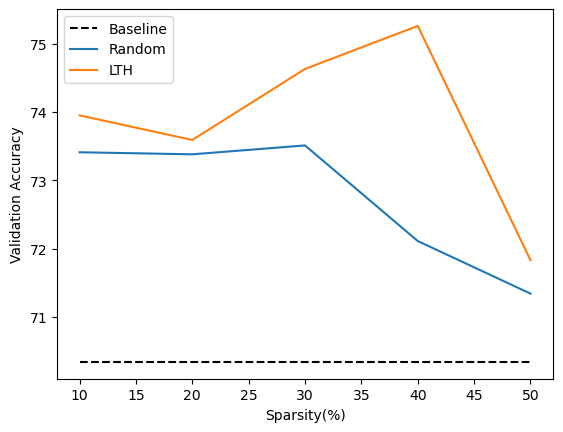

In [95]:
import matplotlib.pyplot as plt


plt.plot([10, 20, 30, 40, 50], [70.34, 70.34, 70.34, 70.34, 70.34], linestyle="--", label="Baseline", color="black")
plt.plot([10, 20, 30, 40, 50], 100*np.array(accuracy_random), label="Random")
plt.plot([10, 20, 30, 40, 50], 100*np.array(accuracy_lth), label="LTH")

plt.xlabel("Sparsity(%)")
plt.ylabel("Validation Accuracy")
plt.legend()



In [ ]:
# Changing the number of epochs and number of rounds

In [18]:
# Create the model
model = [Network().to(device), Network().to(device), Network().to(device),
        Network().to(device), Network().to(device)]

In [19]:
# Set the number of epochs to be used
epochs = [30, 15, 10, 7, 6]

# Set the number of rounds
rounds = [1, 2, 3, 4, 5]

accuracy_rounds = []

# Set the sparsity level for each layer
sparsity = 0.5

# Define Loss
loss_function = torch.nn.CrossEntropyLoss()


# First save the model weights that have been initialized
init_weights = [[model[j].conv[i].weight.data.to(device) for i in range(len(model[j].conv))],
                [model[j].classifier[i].weight.data.to(device) for i in range(len(model[j].classifier))]]


for j in range(1):
    
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    print(f'LTH for {rounds[j]} rounds and {epochs[j]} epochs')
    
    for round_ in range(rounds[j]):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs[j], train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(torch.reshape(torch.abs(model[j].conv[i].weight.data),
                                                      (1, num_filters * num_channels * num_rows * num_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity * 100) ** ((round_ + 1) / rounds[j])) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(
                    torch.reshape(torch.abs(model[j].classifier[i].weight.data), (1, n_rows * n_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity * 100) ** ((round_ + 1) / rounds[j])) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))


    model[j], _, _ = train_model(epochs[j], train_loader, device, model[j], optimizer, loss_function)

    accuracy_rounds.append(test_model(test_loader, device, model[j]))

    print(f"Final Test Accuracy for {rounds[j]} rounds and {epochs[j]} epochs: {test_model(test_loader, device, model[j])} \n\n")


LTH for 1 rounds and 30 epochs



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.301477126758117 	Acc: 0.11094
Epoch: 2
Loss: 2.036375358281538 	Acc: 0.23036
Epoch: 3
Loss: 1.6293892400039127 	Acc: 0.3813
Epoch: 4
Loss: 1.3892758496277167 	Acc: 0.47618
Epoch: 5
Loss: 1.2041499123853796 	Acc: 0.55832
Epoch: 6
Loss: 1.0658108003609015 	Acc: 0.61154
Epoch: 7
Loss: 0.9573388337479223 	Acc: 0.65078
Epoch: 8
Loss: 0.851795134032169 	Acc: 0.6938
Epoch: 9
Loss: 0.7604458757373683 	Acc: 0.72766
Epoch: 10
Loss: 0.6808375111778678 	Acc: 0.75622
Epoch: 11
Loss: 0.5922780572758306 	Acc: 0.78814
Epoch: 12
Loss: 0.5093833903979768 	Acc: 0.81836
Epoch: 13
Loss: 0.44170631079570105 	Acc: 0.84284
Epoch: 14
Loss: 0.3764578836119693 	Acc: 0.86698
Epoch: 15
Loss: 0.2984578476461303 	Acc: 0.89348
Epoch: 16
Loss: 0.25474173268851114 	Acc: 0.90798
Epoch: 17
Loss: 0.19848919827538683 	Acc: 0.92916
Epoch: 18
Loss: 0.16235762448681285 	Acc: 0.94116
Epoch: 19
Loss: 0.14407275881989837 	Acc: 0.9481
Epoch:

In [20]:
for j in range(1, 2):
    
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    print(f'LTH for {rounds[j]} rounds and {epochs[j]} epochs')
    
    for round_ in range(rounds[j]):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs[j], train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(torch.reshape(torch.abs(model[j].conv[i].weight.data),
                                                      (1, num_filters * num_channels * num_rows * num_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity * 100) ** ((round_ + 1) / rounds[j])) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(
                    torch.reshape(torch.abs(model[j].classifier[i].weight.data), (1, n_rows * n_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity * 100) ** ((round_ + 1) / rounds[j])) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))


    model[j], _, _ = train_model(epochs[j], train_loader, device, model[j], optimizer, loss_function)

    accuracy_rounds.append(test_model(test_loader, device, model[j]))

    print(f"Final Test Accuracy for {rounds[j]} rounds and {epochs[j]} epochs: {test_model(test_loader, device, model[j])} \n\n")


LTH for 2 rounds and 15 epochs



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.300262588979033 	Acc: 0.12032
Epoch: 2
Loss: 1.9672953555041262 	Acc: 0.24516
Epoch: 3
Loss: 1.5885060982935875 	Acc: 0.39824
Epoch: 4
Loss: 1.3728183026204024 	Acc: 0.4902
Epoch: 5
Loss: 1.2031384738509918 	Acc: 0.5567
Epoch: 6
Loss: 1.0701814002698036 	Acc: 0.60792
Epoch: 7
Loss: 0.9735781297354442 	Acc: 0.64814
Epoch: 8
Loss: 0.8750862413660034 	Acc: 0.6822
Epoch: 9
Loss: 0.7734022003305537 	Acc: 0.72022
Epoch: 10
Loss: 0.683939956795529 	Acc: 0.75516
Epoch: 11
Loss: 0.6095945005831511 	Acc: 0.78174
Epoch: 12
Loss: 0.5329163731516474 	Acc: 0.80734
Epoch: 13
Loss: 0.45565871814327774 	Acc: 0.83618
Epoch: 14
Loss: 0.36707230544913455 	Acc: 0.87004
Epoch: 15
Loss: 0.32136106529199254 	Acc: 0.88404
Test Accuracy before pruning: 0.7365
Test Accuracy after pruning but no retraining: 0.7373



ROUND 2 Started
----------------------
Epoch: 1
Loss: 0.24084406494713195 	Acc: 0.91276
Epoch: 2
Loss: 0.1910

In [21]:
for j in range(2, 4):
    
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    print(f'LTH for {rounds[j]} rounds and {epochs[j]} epochs')
    
    for round_ in range(rounds[j]):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs[j], train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(torch.reshape(torch.abs(model[j].conv[i].weight.data),
                                                      (1, num_filters * num_channels * num_rows * num_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity * 100) ** ((round_ + 1) / rounds[j])) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(
                    torch.reshape(torch.abs(model[j].classifier[i].weight.data), (1, n_rows * n_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity * 100) ** ((round_ + 1) / rounds[j])) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))


    model[j], _, _ = train_model(epochs[j], train_loader, device, model[j], optimizer, loss_function)

    accuracy_rounds.append(test_model(test_loader, device, model[j]))

    print(f"Final Test Accuracy for {rounds[j]} rounds and {epochs[j]} epochs: {test_model(test_loader, device, model[j])} \n\n")


LTH for 3 rounds and 10 epochs



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.3008820199600573 	Acc: 0.11452
Epoch: 2
Loss: 2.0108010543276893 	Acc: 0.2358
Epoch: 3
Loss: 1.6221695275562804 	Acc: 0.38562
Epoch: 4
Loss: 1.3799979854422761 	Acc: 0.48268
Epoch: 5
Loss: 1.2019104157262446 	Acc: 0.55624
Epoch: 6
Loss: 1.0702650658309918 	Acc: 0.60888
Epoch: 7
Loss: 0.9613461674326826 	Acc: 0.6509
Epoch: 8
Loss: 0.8617118671726998 	Acc: 0.6876
Epoch: 9
Loss: 0.76780297216552 	Acc: 0.724
Epoch: 10
Loss: 0.6922539017541939 	Acc: 0.75094
Test Accuracy before pruning: 0.72
Test Accuracy after pruning but no retraining: 0.514



ROUND 2 Started
----------------------
Epoch: 1
Loss: 0.14258534248794436 	Acc: 0.95076
Epoch: 2
Loss: 0.061530974436351256 	Acc: 0.97938
Epoch: 3
Loss: 0.05019647306691179 	Acc: 0.9828
Epoch: 4
Loss: 0.033364584930288745 	Acc: 0.98844
Epoch: 5
Loss: 0.03839544622618181 	Acc: 0.98674
Epoch: 6
Loss: 0.037209382097301125 	Acc: 0.98688
Epoch: 7
Loss: 0.0211533893

In [22]:
for j in range(4, 5):
    
    optimizer = torch.optim.SGD(model[j].parameters(), lr=0.008, momentum=0.9)

    print(f'LTH for {rounds[j]} rounds and {epochs[j]} epochs')
    
    for round_ in range(rounds[j]):

        print("\n\n\nROUND", round_ + 1, "Started\n----------------------")

        # First train the model for some epochs
        model[j], _, _ = train_model(epochs[j], train_loader,
                                  device, model[j], optimizer, loss_function)
        if round_ == 0:

            print("Test Accuracy before pruning:",
                  test_model(test_loader, device, model[j]))

        else:
            print("Test Accuracy after pruning and retraining:",
                  test_model(test_loader, device, model[j]))

        with torch.no_grad():

            # Now prune the model weights
            for i in range(len(model[j].conv)):

                num_filters = model[j].conv[i].weight.shape[0]
                num_channels = model[j].conv[i].weight.shape[1]
                num_rows = model[j].conv[i].weight.shape[2]
                num_cols = model[j].conv[i].weight.shape[3]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(torch.reshape(torch.abs(model[j].conv[i].weight.data),
                                                      (1, num_filters * num_channels * num_rows * num_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].conv[i].weight.copy_(init_weights[0][i])

                # Now prune
                model[j].masks[i] = torch.reshape(model[j].masks[i],
                                               (1, num_filters * num_channels * num_rows * num_cols)).squeeze()

                val = ((sparsity * 100) ** ((round_ + 1) / rounds[j])) / 100

                model[j].masks[i][indices[:math.ceil(
                    val * num_filters * num_channels * num_rows * num_cols)]] = 0

                model[j].masks[i] = torch.reshape(torch.reshape(
                    model[j].masks[i], (1, num_filters * num_channels * num_rows * num_cols)).squeeze(),
                    (num_filters, num_channels, num_rows, num_cols))

            for i in range(len(model[j].classifier)):

                n_rows = model[j].classifier[i].weight.data.shape[0]
                n_cols = model[j].classifier[i].weight.data.shape[1]

                # Lottery Ticket Style Pruning
                indices = torch.argsort(
                    torch.reshape(torch.abs(model[j].classifier[i].weight.data), (1, n_rows * n_cols)).squeeze())

                # Since we already have the indices to prune, first reset the parameters
                model[j].classifier[i].weight.copy_(init_weights[1][i])

                # Now prune
                model[j].masks[i + 5] = torch.reshape(
                    model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze()
                val = ((sparsity * 100) ** ((round_ + 1) / rounds[j])) / 100

                model[j].masks[i + 5][indices[:math.ceil(val * n_rows * n_cols)]] = 0
                model[j].masks[i + 5] = torch.reshape(torch.reshape(model[j].masks[i + 5], (1, n_rows * n_cols)).squeeze(),
                                                   (n_rows, n_cols))

        print("Test Accuracy after pruning but no retraining:",
              test_model(test_loader, device, model[j]))


    model[j], _, _ = train_model(epochs[j], train_loader, device, model[j], optimizer, loss_function)

    accuracy_rounds.append(test_model(test_loader, device, model[j]))

    print(f"Final Test Accuracy for {rounds[j]} rounds and {epochs[j]} epochs: {test_model(test_loader, device, model[j])} \n\n")


LTH for 5 rounds and 6 epochs



ROUND 1 Started
----------------------
Epoch: 1
Loss: 2.301464475939036 	Acc: 0.10808
Epoch: 2
Loss: 2.0490315637320204 	Acc: 0.23012
Epoch: 3
Loss: 1.6137817902943057 	Acc: 0.38774
Epoch: 4
Loss: 1.3871112860682067 	Acc: 0.48264
Epoch: 5
Loss: 1.2056818354465162 	Acc: 0.55644
Epoch: 6
Loss: 1.0760862034604983 	Acc: 0.60386
Test Accuracy before pruning: 0.6253
Test Accuracy after pruning but no retraining: 0.472



ROUND 2 Started
----------------------
Epoch: 1
Loss: 0.14474177095667481 	Acc: 0.95116
Epoch: 2
Loss: 0.0723576611646301 	Acc: 0.97448
Epoch: 3
Loss: 0.04604115990905182 	Acc: 0.98398
Epoch: 4
Loss: 0.03379546402348563 	Acc: 0.98802
Epoch: 5
Loss: 0.028106627934624245 	Acc: 0.99038
Epoch: 6
Loss: 0.027595766440100606 	Acc: 0.99018
Test Accuracy after pruning and retraining: 0.736
Test Accuracy after pruning but no retraining: 0.7179



ROUND 3 Started
----------------------
Epoch: 1
Loss: 0.06332289551258506 	Acc: 0.97802
Epoch: 2
Loss: 0.05

In [23]:
accuracy_rounds

[0.4139, 0.7503, 0.7508, 0.7521, 0.751]

Text(0, 0.5, 'Validation Accuracy')

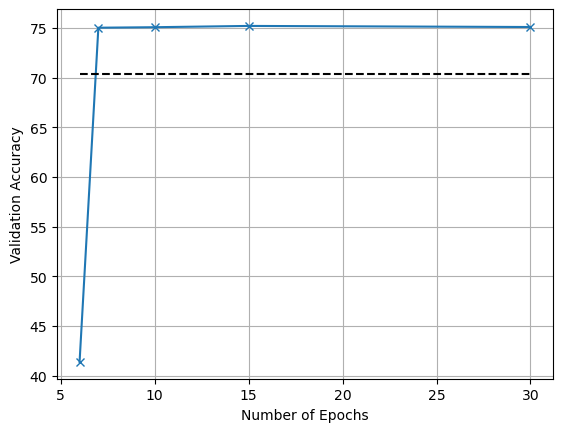

In [29]:
import matplotlib.pyplot as plt

plt.plot([6, 7, 10, 15, 30], 100*np.array(accuracy_rounds), marker='x')
plt.plot([6, 7, 10, 15, 30], [70.34, 70.34, 70.34, 70.34, 70.34], linestyle="--", label="Baseline", color="black")
plt.grid()

plt.xlabel("Number of Epochs")
plt.ylabel("Validation Accuracy")